In [2]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from pathlib import Path
import pandas as pd

In [3]:
import tensorflow as tf


In [4]:
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy


In [2]:
%pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [6]:
path =  r"C:\Users\Owner\OneDrive\Desktop\ML_Project\archive (13)\dataset_new"
img_dir = Path(path)
print(img_dir)

C:\Users\Owner\OneDrive\Desktop\ML_Project\archive (13)\dataset_new


In [7]:
# get filePaths and labels
filepaths = list(img_dir.glob(r'**/*.JPG')) + list(img_dir.glob(r'**/*.jpg')) 
labels = list(map( lambda x:os.path.split(os.path.split(x)[0])[1] , filepaths))

# Convert type to Series
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
DF = pd.concat([filepaths, labels], axis=1)  # image_df
print(DF)

                                               Filepath   Label
0     C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...  Closed
1     C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...  Closed
2     C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...  Closed
3     C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...  Closed
4     C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...  Closed
...                                                 ...     ...
2899  C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...    Open
2900  C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...    Open
2901  C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...    Open
2902  C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...    Open
2903  C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...    Open

[2904 rows x 2 columns]


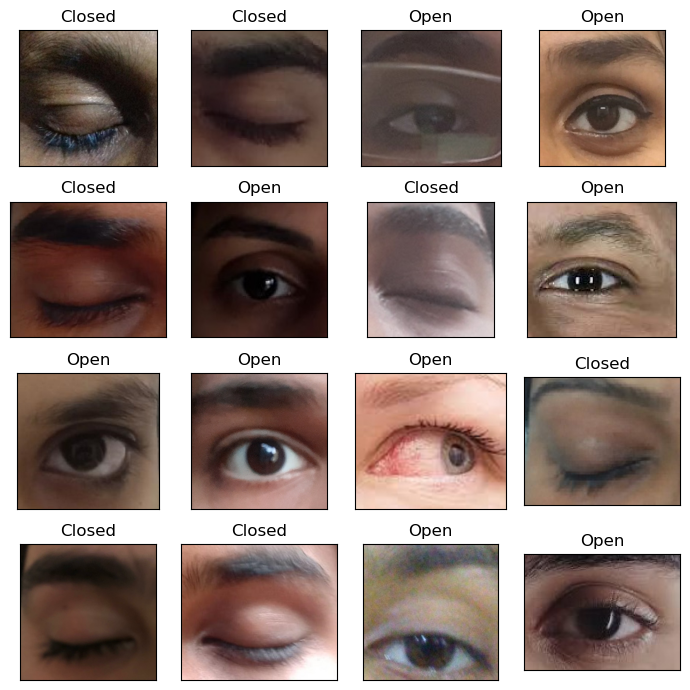

In [8]:
random_index = np.random.randint(0 , len(DF) , 20)
fig,axes = plt.subplots(nrows=4 , ncols=4 , figsize=(7,7) , subplot_kw={'xticks': [], 'yticks': []} )

for i , ax in enumerate(axes.flat):
    ax.imshow(plt.imread(DF.Filepath[random_index[i]]))
    ax.set_title(DF.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [9]:
im = plt.imread(DF.Filepath[6])
im.shape

(300, 376, 3)

In [10]:
DF = DF.sample(frac=1 , random_state=42).reset_index(drop=True)
DF

,Filepath,Label
0,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open
1,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Closed
2,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Closed
3,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Closed
4,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open
...,...,...
2899,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open
2900,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open
2901,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open
2902,C:\Users\Owner\OneDrive\Desktop\ML_Project\arc...,Open


In [11]:
test_DF = DF.iloc[len(DF)-600 :  , :]
DF = DF.iloc[:len(DF)-600 , :]

In [12]:
print(len(test_DF))
print(len(DF))

600
2304


In [13]:
test_DF.shape
DF.shape

(2304, 2)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# BS= 32
# TS=(135,135)
# train_batch= generator('E:/archive (13)/dataset_new/train',shuffle=True, batch_size=BS,target_size=TS)
# valid_batch= generator('E:/archive (13)/dataset_new/test',shuffle=True, batch_size=BS,target_size=TS)
# SPE= len(train_batch.classes)//BS
# VS = len(valid_batch.classes)//BS
# print(SPE,VS)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split
train_image = train_datagen.flow_from_directory(path, target_size=(132,132) , seed=101 , batch_size=32 , class_mode='categorical' , subset='training')
test_image = train_datagen.flow_from_directory(path, target_size=(132,132) , seed=101 , batch_size=32 , class_mode='categorical' , subset='validation')

Found 1163 images belonging to 2 classes.
Found 289 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers,losses

In [23]:
(2304//32)*10

720

In [18]:
CNNModel1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(132, 132, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    
    layers.MaxPooling2D((4,4)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation = 'relu', kernel_regularizer='l1'),
    layers.Dense(2, activation = 'sigmoid')
])

In [20]:
CNNModel1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model2History = CNNModel1.fit(train_image , steps_per_epoch=len(train_image) , validation_data= test_image , validation_steps=len(test_image),epochs=10)

Epoch 1/10
37/37 [==============================] - 50s 850ms/step - loss: 17.8605 - accuracy: 0.7954 - val_loss: 13.4869 - val_accuracy: 0.8339
Epoch 2/10
37/37 [==============================] - 11s 293ms/step - loss: 10.2406 - accuracy: 0.8452 - val_loss: 7.5455 - val_accuracy: 0.8028
Epoch 3/10
37/37 [==============================] - 10s 270ms/step - loss: 5.6579 - accuracy: 0.8349 - val_loss: 4.1982 - val_accuracy: 0.8512
Epoch 4/10
37/37 [==============================] - 10s 261ms/step - loss: 3.4032 - accuracy: 0.8521 - val_loss: 2.9768 - val_accuracy: 0.8512
Epoch 5/10
37/37 [==============================] - 10s 257ms/step - loss: 2.5675 - accuracy: 0.8633 - val_loss: 2.4438 - val_accuracy: 0.8512
Epoch 6/10
37/37 [==============================] - 10s 259ms/step - loss: 2.1574 - accuracy: 0.8607 - val_loss: 2.1302 - val_accuracy: 0.8512
Epoch 7/10
37/37 [==============================] - 10s 256ms/step - loss: 1.8395 - accuracy: 0.8822 - val_loss: 1.9356 - val_accuracy: 0.8

In [21]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def TestInput(CNNModelSaved, imgMatrix):
    labels = ["Closed", "Open"]
 
    # Resize the input image to match the expected input shape of the model
    imgMatrix = cv2.resize(imgMatrix, (132, 132))
 
    imgMatrix = imgMatrix.astype('float32')
    imgMatrix /= 255.0
    imgMatrix = cv2.cvtColor(imgMatrix, cv2.COLOR_BGR2RGB)
    imgMatrix = imgMatrix.reshape((1, 132, 132, 3))
 
    c = CNNModelSaved.predict(imgMatrix)
    p = np.argmax(c)
    print(c)
 
    return labels[p]


1/1 [==============================] - 0s 110ms/step
[[0.47302136 0.5463711 ]]
Open
Open


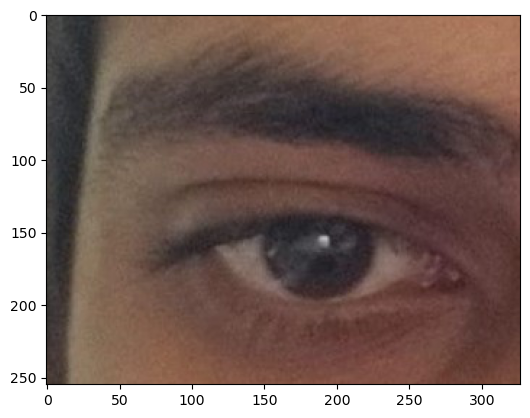

In [20]:
y_act_data = plt.imread(test_DF.Filepath.iloc[6])
y_act_label = test_DF.Label.iloc[6]
y_pred = TestInput(CNNModel1 , y_act_data)
print(y_pred)
print(y_act_label)
plt.imshow(y_act_data)